### Computational Intelligence Assignment 1
##### Ostapovich Oleg

In [542]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import random
import cvxpy

### Task 1.1

In [543]:
def plane(v,w,p):
    n = np.cross(v,w) / np.linalg.norm(np.cross(v,w))
    if n[0,2] == 0: # Trying to avoid zero division
        z = np.zeros((nofdots, nofdots)) + p[0, 2]
    else: z = (n[0,0] * (x - p[0,0]) + n[0,1] * (y-p[0,1])) * (-1) / n[0,2]  + p[0,2]
    ax = plt.subplot(projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.plot_surface(x, y, z)
    return n

In [544]:
def Task11(v1, w1, v2, w2):
    n1 = np.cross(v1,w1) / np.linalg.norm(np.cross(v1,w1))
    n2 = np.cross(v2,w2) / np.linalg.norm(np.cross(v2,w2))
    angle = np.linalg.norm(np.cross(n1,n2))/np.linalg.norm(n1)/np.linalg.norm(n2)
    if angle!=0: print('Intersection!')
    else: print('No intersection')

In [545]:
nofdots=10
linspace = np.linspace(-10, 10, nofdots)
x,y = np.meshgrid(linspace, linspace)

Intersection!


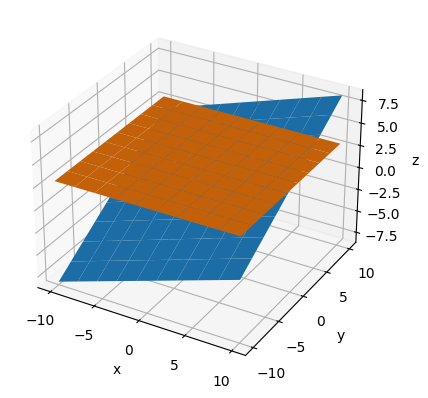

In [546]:
v1 = np.array([random.sample(range(5), 3)])
w1 = np.array([random.sample(range(5), 3)])
p1 = np.array([[0,0,0]])
v2 = np.array([random.sample(range(5), 3)])
w2 = np.array([random.sample(range(5), 3)])
p2 = np.array([random.sample(range(5), 3)])
#Cheking for intersection
Task11(v1, w1, v2, w2)
#Visualization
n1 = plane(v1,w1,p1)
n2 = plane(v2,w2,p2)

No intersection


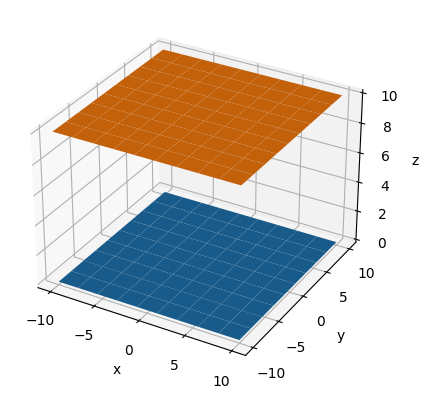

In [547]:
v1 = np.array([random.sample(range(5), 3)])
w1 = np.array([random.sample(range(5), 3)])
p1 = np.array([[0,0,0]])
v2 = v1
w2 = w1
p2 = np.array([[10,10,10]]) # Parallel plane
#Cheking for intersection
Task11(v1, w1, v2, w2)
#Visualization
n1 = plane(v1,w1,p1)
n2 = plane(v2,w2,p2)

### Task 1.2

In [548]:
def Task12(n,p,v,w):
    return f'[{round(n[0,0],1)},{round(n[0,1],1)},{round(n[0,2],1)}] * ([x, y, z] - [{p[0,0]}, {p[0,1]}, {p[0,2]}] = 0\n[{p[0,0]}, {p[0,1]}, {p[0,2]}] [{v[0,0]}, {v[0,1]}, {v[0,2]}] [{w[0,0]}, {w[0,1]}, {w[0,2]}]'

[-1.0,0.2,-0.1] * ([x, y, z] - [0, 1, 0] = 0
[0, 1, 0] [1, 7, 4] [2, 8, -5]


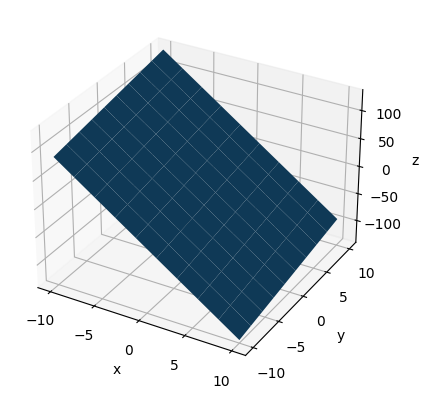

In [549]:
v = np.array([[1,7,4]])
w = np.array([[2,8,-5]])
p = np.array([[0,1,0]])
n = plane(v,w,p)
print(Task12(n, p, v, w))

[0.7,-0.7,0.0] * ([x, y, z] - [-1, 0, 0] = 0
[-1, 0, 0] [-2, -2, 1] [5, 5, -5]


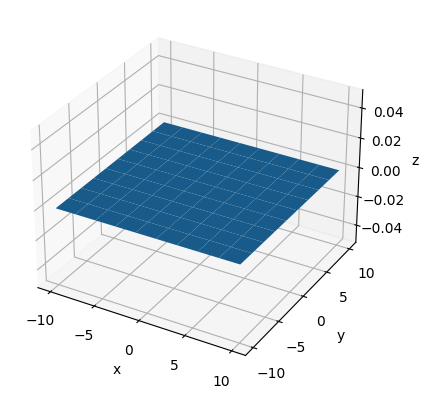

In [550]:
v = np.array([[-2,-2,1]])
w = np.array([[5,5,-5]])
p = np.array([[-1,0,0]])
n = plane(v,w,p)
print(Task12(n, p, v, w))

### Task 1.3

Parameters of line:
x:-0.9 y:-0.35 z:-0.25
Projection is:  8.822082845260704


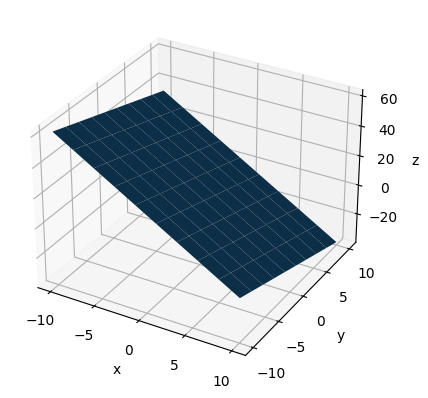

In [551]:
p = np.array([[2,2,2]])
v = np.array([[-2,3,3]])
w = np.array([[1,1,-5]])
g = np.array([[-10,-3,5]])

n = plane(v,w,p)
print(f'Parameters of line:\nx:{n[0,0].round(2)} y:{n[0,1].round(2)} z:{n[0,2].round(2)}')
print('Projection is: ', np.dot(g[0], n[0]))

### Task 1.4

g = [-10, -3, 5]
g* = [-10.0, -1.0, 9.0]


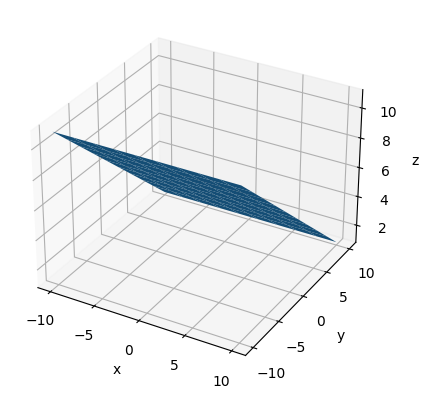

In [552]:
v = np.array([[1,0,0]])
w = np.array([[4,2,-1]])
p = np.array([[-5,11,0.5]])
g = np.array([[-10,-3,5]])

g_on_plane = np.array([[g[0, 0] - p[0, 0], g[0, 1] - p[0, 1], g[0, 2] - p[0, 2]]])
n = plane(v,w,p)
sinus = np.dot(g_on_plane[0], n[0])
symmetrical_g = g - 2 * sinus * n
print(f"g = [{g[0,0]}, {g[0,1]}, {g[0,2]}]")
print(f"g* = [{symmetrical_g[0, 0]}, {symmetrical_g[0, 1]}, {symmetrical_g[0, 2]}]")

### Task 2.1

Basis:
Vector 1 | Vector 2
[[ 0.4264  0.    ]
 [-0.6396 -0.7071]
 [-0.6396  0.7071]]


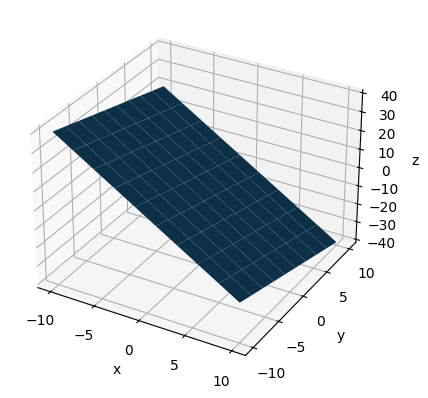

In [553]:
matrix = np.array([[3,1,1],
                   [6,2,2],
                   [-9,-3,-3]])
#Basis vectors
n = scipy.linalg.null_space(matrix) # I don't know why, but sympy library gives me wrong basis so I used scipy
print(f"Basis:\nVector 1 | Vector 2\n{n.round(4)}")
#Visualization
v = np.array([n[:,0]])
w = np.array([n[:,1]])
p = np.array([[0,0,0]])
n = plane(v,w,p)

### Task 2.2

Orthogonal projection of vector g onto V:  [[-0.27272727 -0.09090909 -0.09090909]]
Orthogonal projection of vector g onto orthogonal compliment of V:  [[-0.72727273 -0.90909091  3.09090909]]


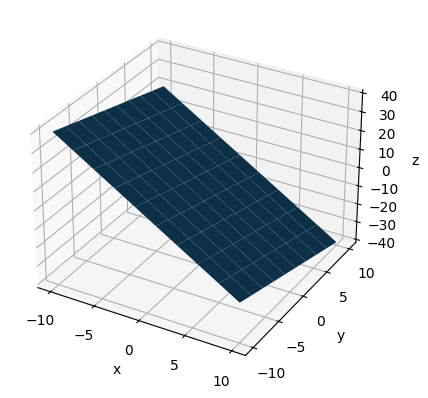

In [554]:
g = np.array([[-1, -1, 3]])
n = plane(v,w,p)
g_orth_p = np.dot(g[0], n[0]) * n
print("Orthogonal projection of vector g onto V: ", g_orth_p)

g_orth_c = g - g_orth_p
print("Orthogonal projection of vector g onto orthogonal compliment of V: ", g_orth_c)

In [555]:
# dot product between vectors should be zero and sum of vectors that are orthogonal to each other is equal to initial
if (np.dot(g_orth_p[0], g_orth_c[0]) == 0) and (round((g_orth_p[0] ** 2).sum() + (g_orth_c[0] ** 2).sum(),1) == (g[0]**2).sum()):
    print('Propose is correct')
else: print('Propose is wrong')

Propose is correct


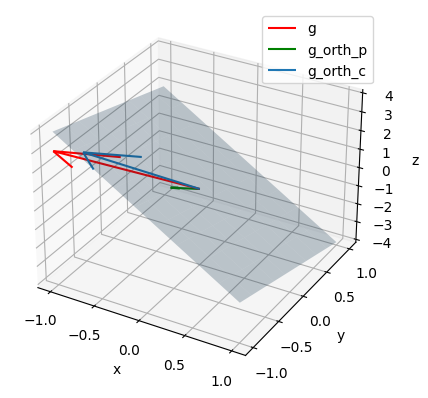

In [556]:
linspace = np.linspace(-1, 1, nofdots)
x,y = np.meshgrid(linspace, linspace)
n = np.cross(v,w) / np.linalg.norm(np.cross(v,w))
if n[0,2] == 0:
    z = np.zeros((nofdots, nofdots)) + p[0, 2]
else: z = (n[0,0] * (x - p[0,0]) + n[0,1] * (y-p[0,1])) * (-1) / n[0,2]  + p[0,2]
ax = plt.subplot(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot_surface(x, y, z, alpha = 0.25)
ax.quiver3D(0, 0, 0, g[0,0], g[0,1], g[0,2], label = 'g', color='r')
ax.quiver3D(0, 0, 0, g_orth_p[0, 0], g_orth_p[0, 1], g_orth_p[0, 2], label = 'g_orth_p', color='g')
ax.quiver3D(0, 0, 0, g_orth_c[0, 0], g_orth_c[0, 1], g_orth_c[0, 2], label = 'g_orth_c')
ax.legend()
plt.show()

### Task 2.3

In [557]:
# Sum of vectors is equal to starting vector
print('Sum of vectors: ', g_orth_c + g_orth_p)
print('Vector g:       ', g)
# I have already prove that sum of orthogonal vectors are equal starting vector g in task 2.2

Sum of vectors:  [[-1. -1.  3.]]
Vector g:        [[-1 -1  3]]


### Task 3.1

![](photo_2023-02-15_19-39-51.jpg)

### Task 3.2

In [558]:
# Gathered matrices
A = np.array([[1,1],
              [1,2],
              [-1,0],
              [0,-1],
              [0,1]])
B = np.array([[6],
              [8],
              [0],
              [0],
              [9]])
H = np.array([[1,0],
              [0,8]])
c = np.array([[0],
              [-32]])
c0 = np.array([[60]])

In [559]:
x = cvxpy.Variable((2,1))

obj = cvxpy.Minimize(0.5*cvxpy.quad_form(x,H) + c.T@x + c0)

constrain = [A@x <= B]

prob = cvxpy.Problem(obj,constrain)
res = prob.solve()
x_opt, y_opt = x.value[0], x.value[1]
print("The minimal value is", res)
print("The optimal values for x:", x_opt, y_opt)

The minimal value is -4.0
The optimal values for x: [-1.94410283e-24] [4.]


In [560]:
x1 = cvxpy.Variable()
x2 = cvxpy.Variable()

obj = 0.5*x1**2 + 4*x2**2 - 32*x2 + 60

constrains = [x1+x2<=6,
             x1+2*x2<=8,
             x1>=0,
             x2>=0,
             x2<=9]
#Solver:
prob = cvxpy.Problem(cvxpy.Minimize(obj), constrains)
res = prob.solve()

#Print result:
print("The minimal value is", res)
print("The optimal values for x:", x1.value, x2.value)

The minimal value is -4.0
The optimal values for x: -1.944102834068013e-24 3.9999999999999996


### Task 3.3

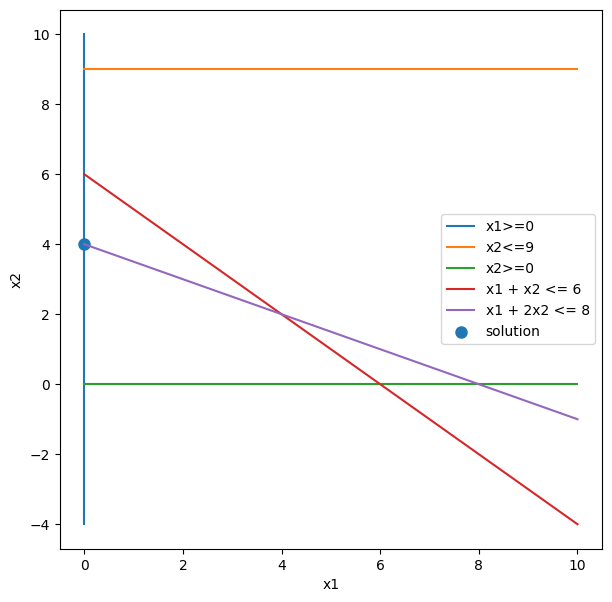

In [561]:
# Domain visualization
x_space = np.linspace(0, 10, nofdots)

# Plotting
plt.figure(figsize=(7,7))
plt.plot(np.zeros(nofdots), np.linspace(-4, 10, nofdots), label='x1>=0')
plt.plot(x_space, np.zeros(nofdots)+9, label='x2<=9')
plt.plot(x_space, np.zeros(nofdots), label='x2>=0')
plt.plot(x_space, 6 - x_space, label='x1 + x2 <= 6')
plt.plot(x_space, (8-x_space)/2, label='x1 + 2x2 <= 8')
plt.scatter(x_opt, y_opt, linewidth=3, label='solution')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

Solution coordinates is:  -0.0 4.0 -4.0


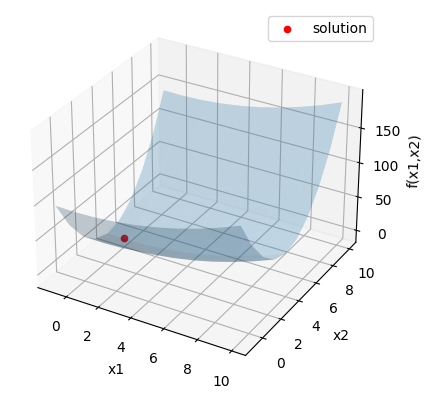

In [562]:
# Cost function visualization
ax = plt.subplot(projection='3d')
linspace = np.linspace(-1, 10, nofdots)

#Plain
print('Solution coordinates is: ', x1.value.round(), x2.value.round(), pz.item())
x,y = np.meshgrid(linspace, linspace)
z = 0.5*x**2 + 4*y**2 - 32*y + c0
pz = 1/2*x1.value**2 + 4 * x2.value**2 - 32 * x2.value + c0
ax.plot_surface(x, y, z, alpha=0.25)
ax.scatter(x1.value, x2.value, pz, color='r', label='solution')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("f(x1,x2)")
ax.legend()
plt.show()